In [3]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease_Data.csv to Heart_Disease_Data.csv


In [1]:
from __future__ import print_function

import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,SGD,Adagrad,Adadelta,Adam, Adamax, Nadam
from tensorflow.keras.regularizers import l1

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [30]:
df = pd.read_csv('Heart_Disease_Data.csv')
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


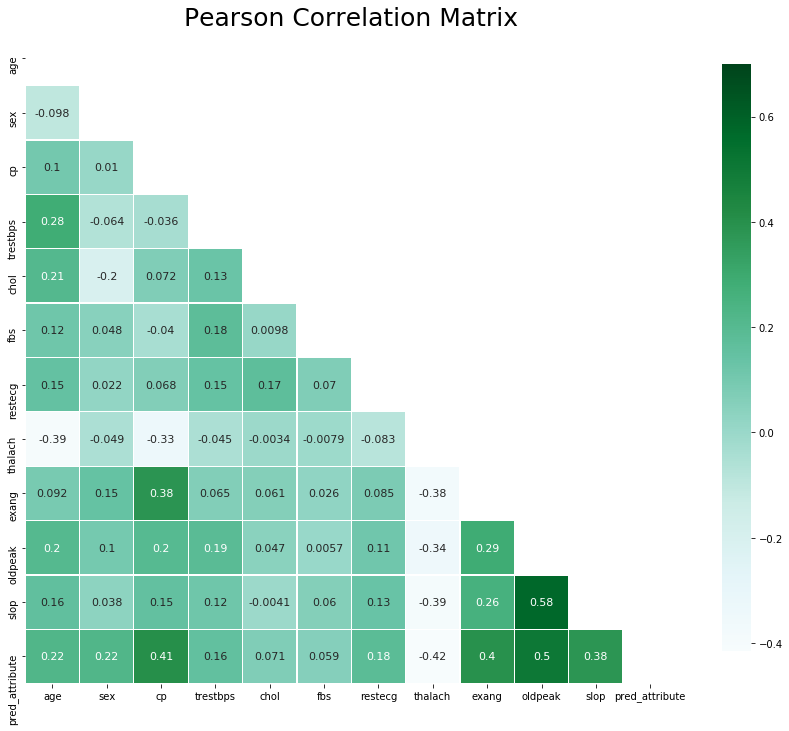

In [5]:
features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slop','ca','thal','pred_attribute']#,'GeoGenEx']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":11},mask=mask,cbar_kws={"shrink": .9});

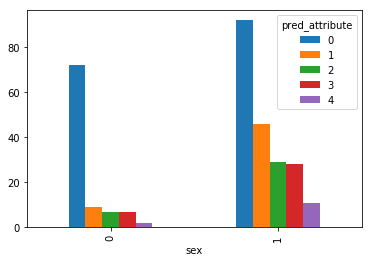

In [21]:
pd.crosstab(df['sex'],df['pred_attribute']).plot(kind='bar')

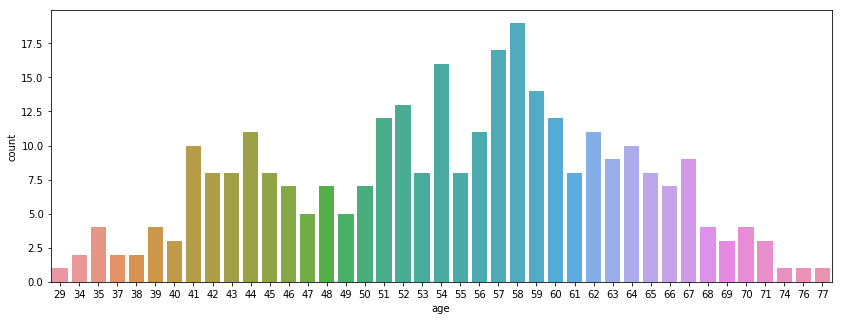

In [17]:
fig, ax = plt.subplots(figsize=[14, 5])
sns.countplot(x = "age", data = df)

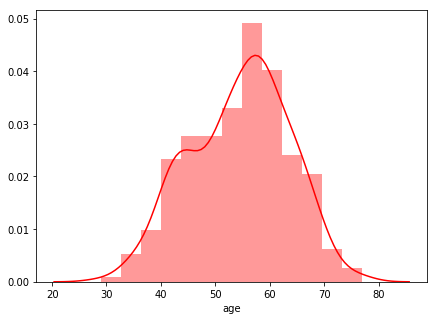

In [18]:
fig, axe = plt.subplots(figsize = [7, 5])
sns.distplot(df['age'], color = 'r');

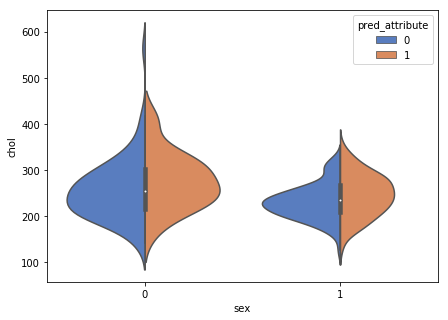

In [31]:
df['pred_attribute'] = np.where((df['pred_attribute']>0), 1, 0)
  
ax, figure = plt.subplots(figsize = [7, 5])
sns.violinplot(x = "sex", y = "chol", hue="pred_attribute", data = df, palette = "muted", split=True)

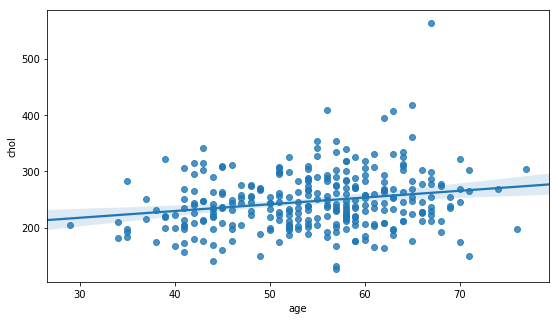

In [32]:
ax, figure = plt.subplots(figsize = [9,5])
sns.regplot(x="age", y="chol", data=df);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 35        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Test loss: 0.2827631269322067
Test accuracy: 0.89508194


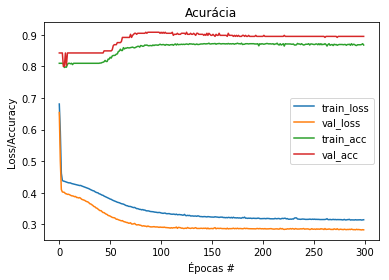

In [40]:
df = pd.read_csv('Heart_Disease_Data.csv')
#df = df.drop(columns=['oldpeak','ca'])
df['thal'] = df['thal'].replace('?',3)
df['ca'] = df['ca'].replace('?',0)

#Normalizando os campos com ranges diferentes.
df['chol'] = df['chol']/max(df['chol'])
df['trestbps']=df['trestbps']/max(df['trestbps'])
df['thalach']=df['thalach']/max(df['thalach'])

X = df.iloc[:, :-1].values #todas as linhas e colunas menos a última
y = df.iloc[:, -1].values #última coluna do df

batch_size = 6
num_classes = 5
epochs = 300

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# convertendo os vetores das classes em matrizes de classificação binárias
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Definição da arquitetura do modelo
model = Sequential()
model.add(tf.keras.layers.Dense(6, kernel_initializer = 'uniform', input_dim=13,activation='relu'))
model.add(tf.keras.layers.Dense(6,  kernel_initializer = 'uniform', activation='relu'))
model.add(tf.keras.layers.Dense(5,  kernel_initializer = 'uniform', activation='sigmoid'))


model.summary()

model.compile(loss='binary_crossentropy',
              #optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              #optimizer=SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              #optimizer=Adagrad(lr=0.01, epsilon=None, decay=0.0),
              #optimizer=Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
              #optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              #optimizer=Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              #optimizer=Adadelta(),
              optimizer = 'adam',
              metrics=['accuracy'])

# Treinamento do modelo 
H = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_test, y_test)
             )

# Avaliação do modelo no conjunto de teste
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plotando 'loss' e 'accuracy' para os datasets 'train' e 'test'
plt.figure()
plt.plot(np.arange(0,epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0,epochs), H.history["val_acc"], label="val_acc")
plt.title("Acurácia")
plt.xlabel("Épocas #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()